<a href="https://colab.research.google.com/github/ddapun/padatminb2kel1/blob/main/Copy_of_Final_Project_Data_Mining_Kel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anggota Kelompok 1 B2 :**

1. Ulya Nur Chamidah - 2109116067
2. Carmennita Soleman - 2109116076
3. Khairunnisa - 2109116079
4. Ahmad Fariz Aisyar Dafin - 2109116083

Dengan menggunakan algoritma Naive Bayes dan KNN

## Library

In [1]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import KMeans

# Analisis Data Supervised

### Bussiness Understanding 

Analisis data supervised adalah proses mengolah data yang memiliki label sehingga bertujuan untuk mengelompokkan data ke data yang sudah ada.

Tujuan penggunaan dataset ini untuk melakukan analisis terperinci tentang memprediksi harga penjualan dan mempraktikkan rekayasa fitur, dan peningkatan gradien

### Data Understanding 

1. Collect Data
2. Penjelasan Setiap Column

Data didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/code/emrearslan123/house-price-prediction/notebook 

### Collect Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/khaaair/ProjectAkhir_Datmin/main/train%20(1).csv")

### Describe Data

In [3]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### Deskripsi Tiap Column

In [4]:
df.info()
# Dataset ini memiliki 1459 baris dan 80 kolom. 
# Dataset ini memiliki 3 jenis tipe data yaitu int, float, dan object. Terdapat juga 2240 nilai pada setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# describing data 
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
# untuk mengecek missing value :
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#Data Exploration

### Data Preparation

In [7]:


# # Load dataset train.csv

# # Hitung rata-rata SalePrice
# mean_saleprice = df['SalePrice'].mean()

# # Membuat kolom kategori dari kolom SalePrice
# df['saleprice_category'] = df['SalePrice'].apply(lambda x: 'Murah' if x < mean_saleprice else 'Mahal')

# df['saleprice_category'] = df['saleprice_category'].map({'Mahal':1, 'Murah':0})

In [8]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ipython-input-10-0ac9fbe711e6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdBu")


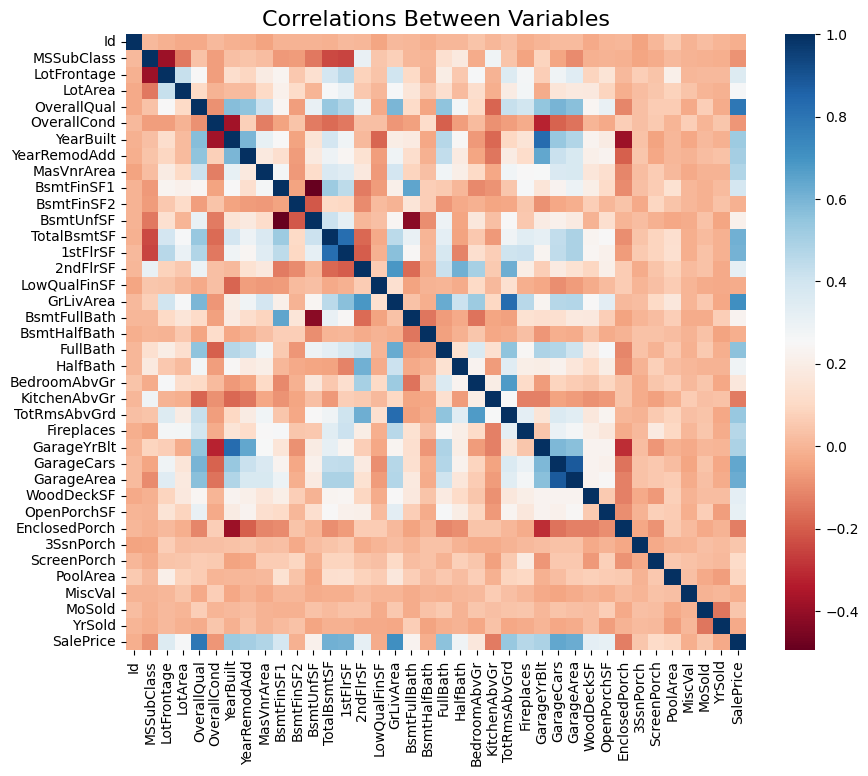

In [10]:
#Visualisasi Data apa saja yang berkorelasi antar variabel
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

In [11]:
#Berdasarkan hasil diatas, hanya ada beberapa kolom yang akan kita ambil
#Yang kita ambil adalah kolom numerik yang korelasinya lebih dari 0.50 dan yang kurang dari -0.50
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
#cat_cols disini digunakan sebagai kolom kategori
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
#sehingga kolom yang penting adalah sebagai berikut :

important_cols = important_num_cols + cat_cols

df = df[important_cols]

<ipython-input-11-9674f3fc9ea7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)


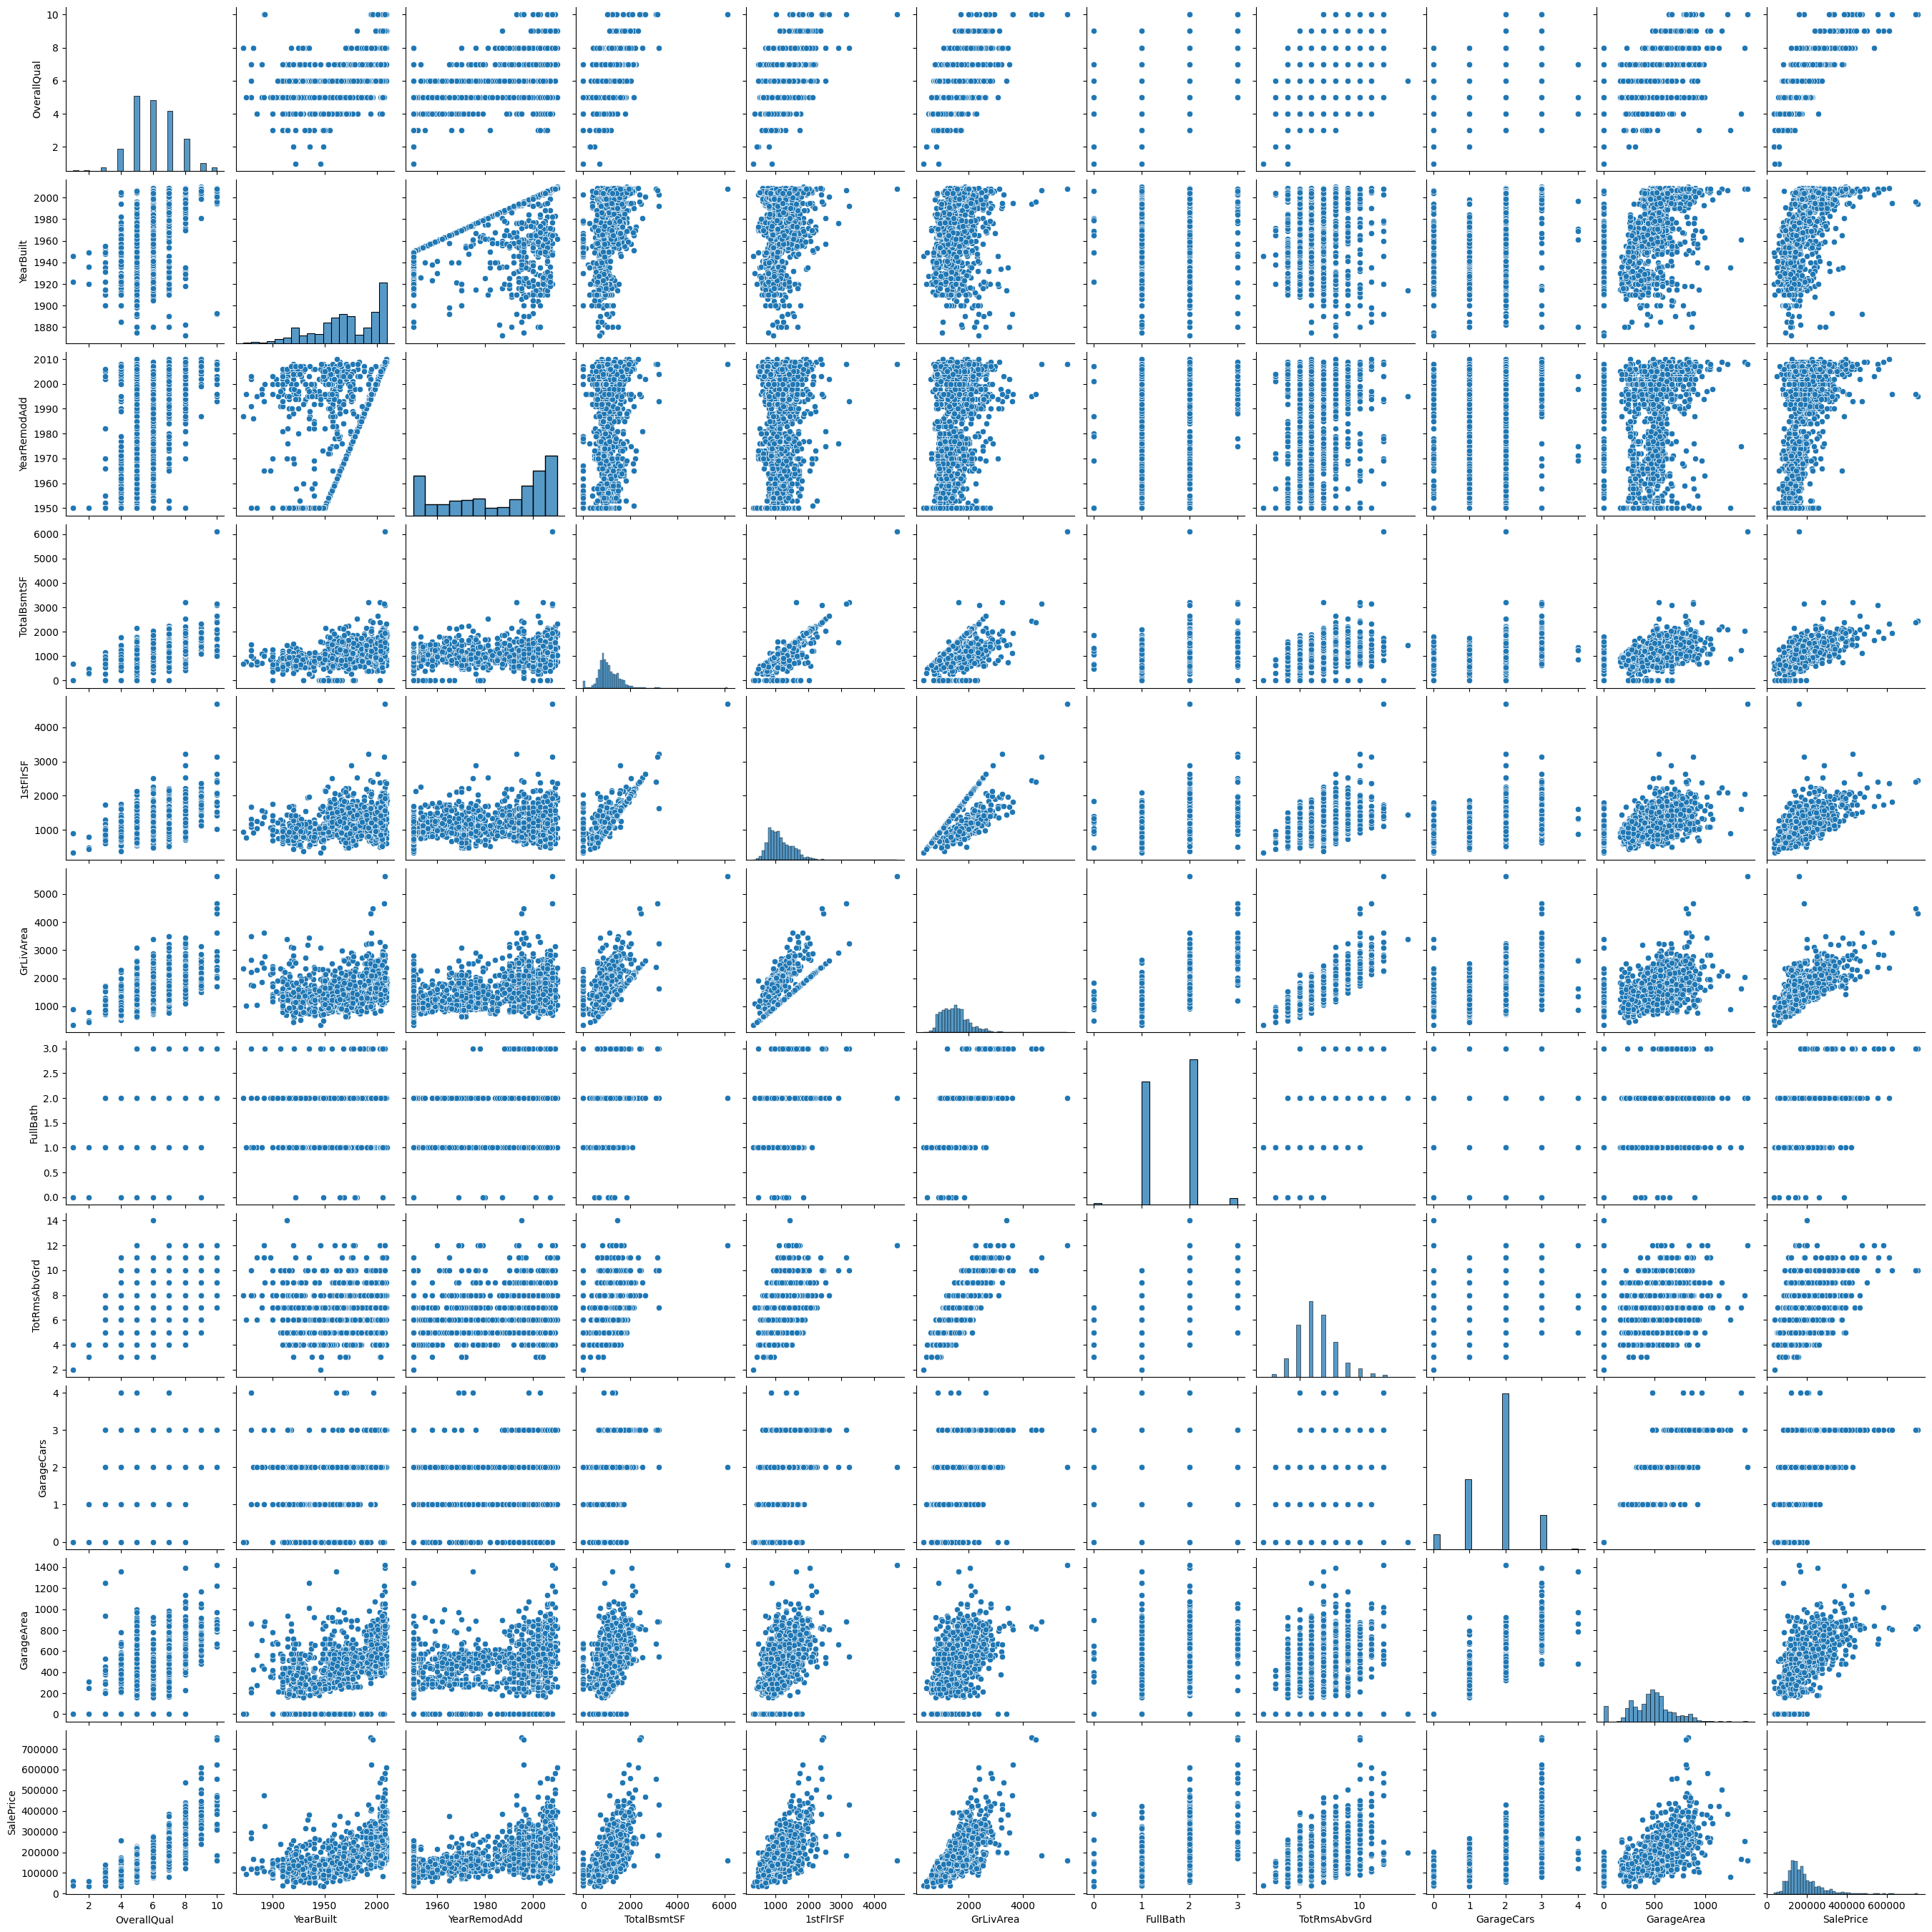

In [12]:
sns.pairplot(df[important_num_cols])

<Figure size 1000x800 with 0 Axes>

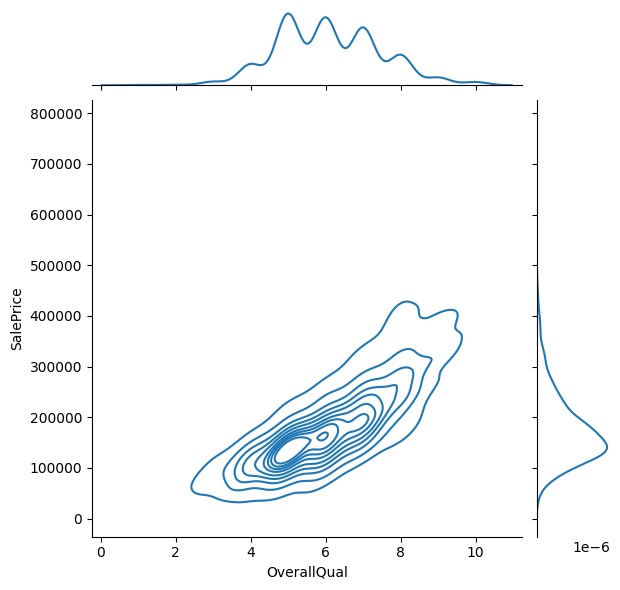

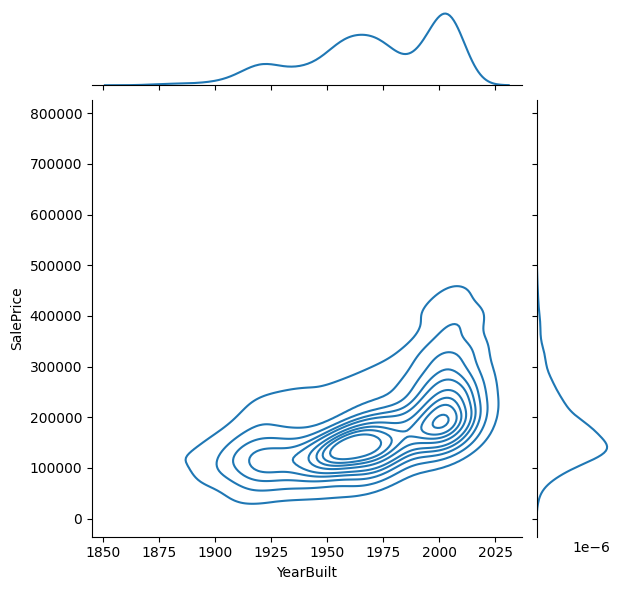

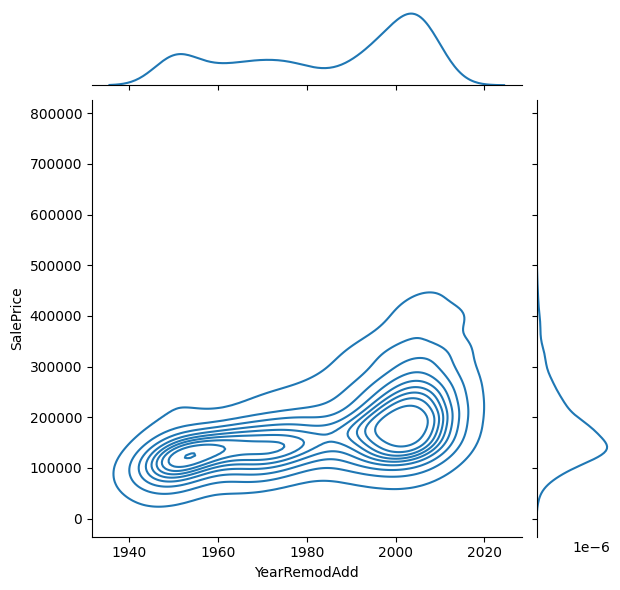

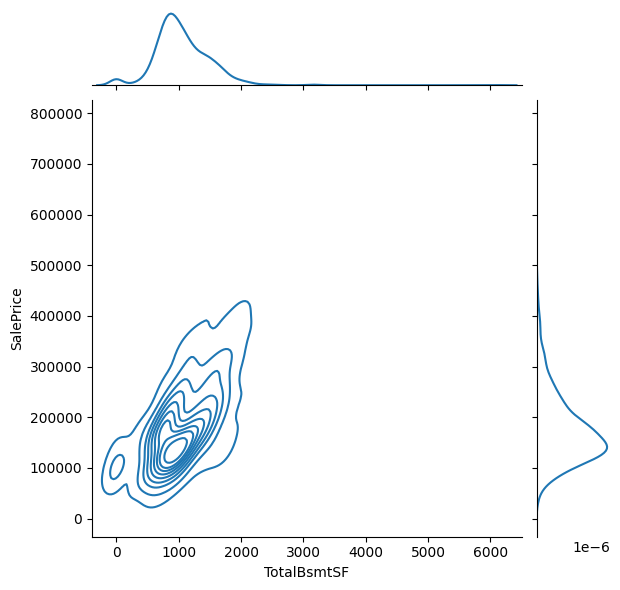

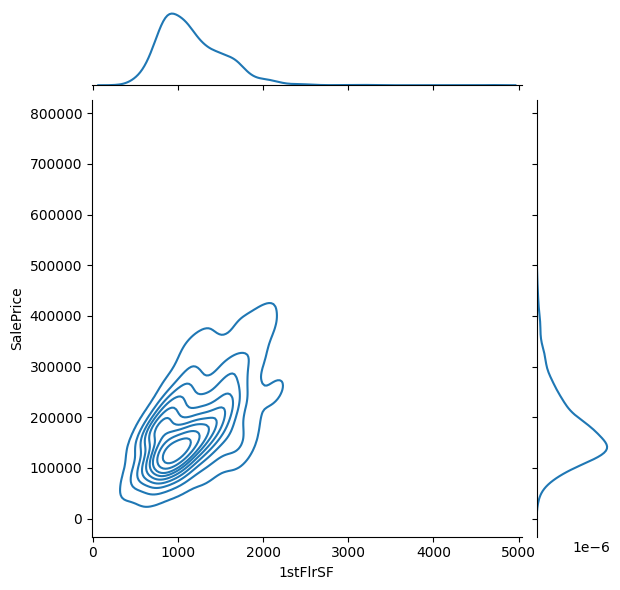

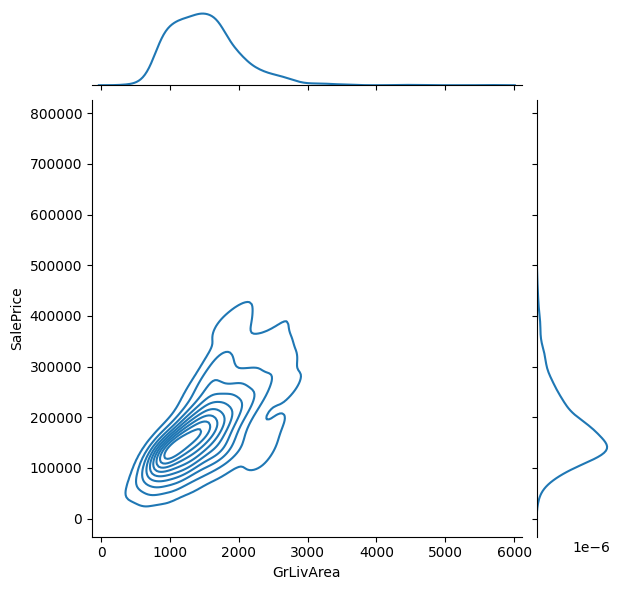

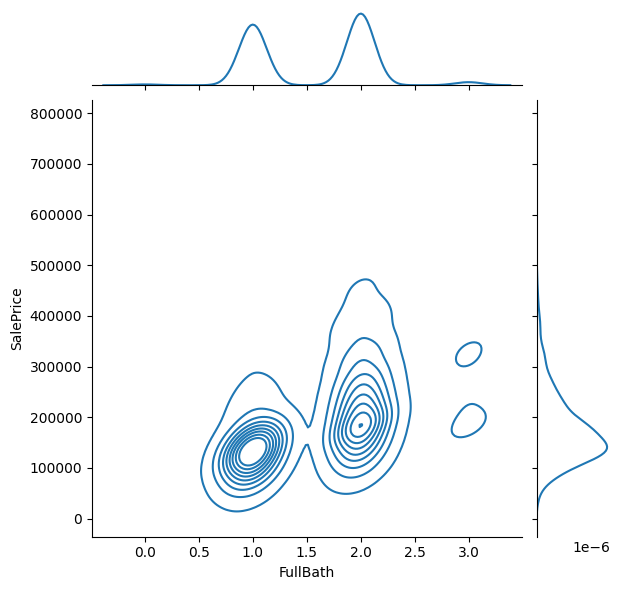

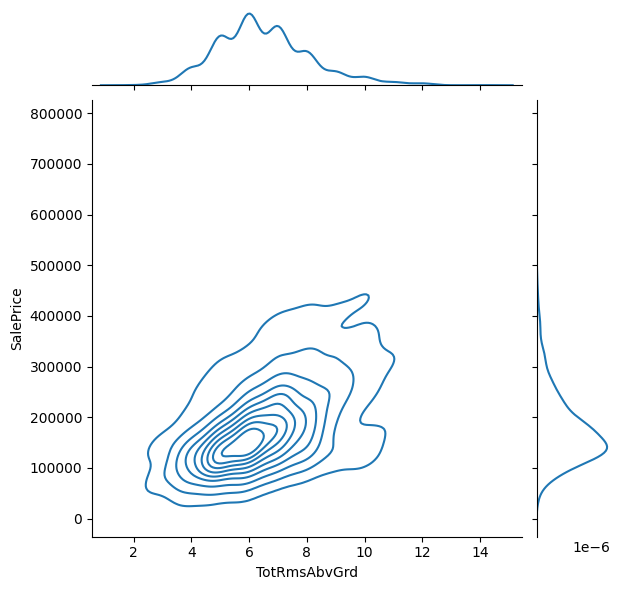

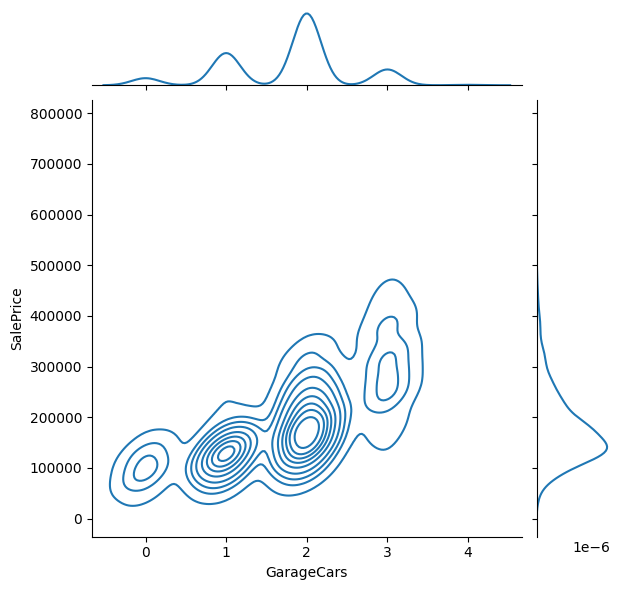

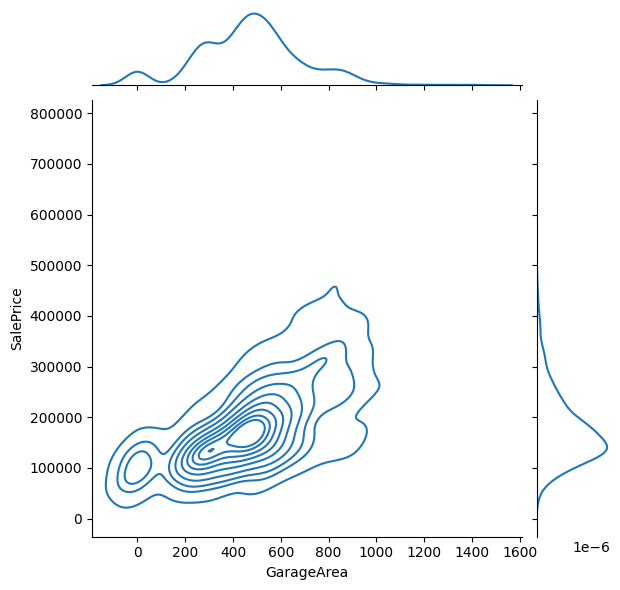

In [13]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

In [14]:
df

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice MSZoning  \
0            2             8           2         548     208500       RL   
1            2             6           2         460     181500       RL   
2            2             6           2         608     223500       RL   
3            1             7           3         642     140000       RL   
4            2             9           3         836     250000       RL   
...        ...           ...         ...         ...        ...      ...   
1455         2             7           2         460     175000       RL   
1456         2             7           2         500     210000       RL   
1457         2             9           1         252     266500       RL   
1458         1             5           1         240     142125       RL   
1459         1             6           1         276     147500       RL   

     Utilities BldgType Heating KitchenQual SaleCondition LandSlope  
0       AllPub     1Fam    GasA          Gd        Normal       Gtl  
1       AllPub     1Fam    GasA          TA        Normal       Gtl  
2       AllPub     1Fam    GasA          Gd        Normal       Gtl  
3       AllPub     1Fam    GasA          Gd       Abnorml       Gtl  
4       AllPub     1Fam    GasA          Gd        Normal       Gtl  
...        ...      ...     ...         ...           ...       ...  
1455    AllPub     1Fam    GasA          TA        Normal       Gtl  
1456    AllPub     1Fam    GasA          TA        Normal       Gtl  
1457    AllPub     1Fam    GasA          Gd        Normal       Gtl  
1458    AllPub     1Fam    GasA          Gd        Normal       Gtl  
1459    AllPub     1Fam    GasA          TA        Normal       Gtl  

[1460 rows x 18 columns]

In [15]:


# Load dataset train.csv

# Hitung rata-rata SalePrice
mean_saleprice = df['SalePrice'].mean()

# Membuat kolom kategori dari kolom SalePrice
df['saleprice_category'] = df['SalePrice'].apply(lambda x: 'Murah' if x < mean_saleprice else 'Mahal')


<ipython-input-15-f8ded60d84b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['saleprice_category'] = df['SalePrice'].apply(lambda x: 'Murah' if x < mean_saleprice else 'Mahal')


In [16]:
df['saleprice_category'] = df['saleprice_category'].map({'Mahal':1, 'Murah':0}).astype(int)


<ipython-input-16-8c7072035c76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['saleprice_category'] = df['saleprice_category'].map({'Mahal':1, 'Murah':0}).astype(int)


In [17]:
#Kemudian kita check lagi apakah ada kolom yang kosong
df.isna().sum()

OverallQual           0
YearBuilt             0
YearRemodAdd          0
TotalBsmtSF           0
1stFlrSF              0
GrLivArea             0
FullBath              0
TotRmsAbvGrd          0
GarageCars            0
GarageArea            0
SalePrice             0
MSZoning              0
Utilities             0
BldgType              0
Heating               0
KitchenQual           0
SaleCondition         0
LandSlope             0
saleprice_category    0
dtype: int64

In [18]:
save_df = df

### Modelling

Splitting

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OverallQual         1460 non-null   int64 
 1   YearBuilt           1460 non-null   int64 
 2   YearRemodAdd        1460 non-null   int64 
 3   TotalBsmtSF         1460 non-null   int64 
 4   1stFlrSF            1460 non-null   int64 
 5   GrLivArea           1460 non-null   int64 
 6   FullBath            1460 non-null   int64 
 7   TotRmsAbvGrd        1460 non-null   int64 
 8   GarageCars          1460 non-null   int64 
 9   GarageArea          1460 non-null   int64 
 10  SalePrice           1460 non-null   int64 
 11  MSZoning            1460 non-null   object
 12  Utilities           1460 non-null   object
 13  BldgType            1460 non-null   object
 14  Heating             1460 non-null   object
 15  KitchenQual         1460 non-null   object
 16  SaleCondition       1460

In [20]:

df = pd.get_dummies(df)

X = df.drop(["SalePrice","saleprice_category"], axis=1)
y = df["saleprice_category"]

# X = pd.get_dummies(X, columns=cat_cols)

unwanted_cols = ["SalePrice", "saleprice_category"]
for col in unwanted_cols:
    if col in important_num_cols:
        important_num_cols.remove(col)
        
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Validation

In [21]:
# definisikan model KNN
clf = KNeighborsClassifier()

# definisikan hyperparameter yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# tampilkan parameter terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])

# tampilkan skor validasi terbaik
print("Skor validasinya:", grid_search.best_score_)

Nilai k terbaik: 5
Skor validasinya: 0.9143611753053813


Pre-processing

In [22]:
scaler = StandardScaler()

# fit and transform the training data
x_train_scaled = scaler.fit_transform(X_train)

# convert the scaled training data to a Pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=X_train.columns)

# transform the testing data using the fitted scaler
x_test_scaled = scaler.transform(X_test)

# convert the scaled testing data to a Pandas DataFrame
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=X_test.columns)

C45

In [23]:
# inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train model pada data train
dtc.fit(X_train, y_train)

# evaluasi model pada data test
dtc_pred = dtc.predict(X_test)

GNB

In [24]:
class GaussianNB:
    # Constructor
    def __init__(self):
        self.sigmas = dict()
        self.dispersions = dict()
        self.probs = dict()
        self.index = None
        self.targets = None
        self.columns = None

    def fit(self, x, y):
        # Convert x to DataFrame
        x = pd.DataFrame(x, columns=self.columns)

        # Store the original index of x
        self.index = x.index

        # Preparing sigma / dispersion dictionaries for numeric columns
        self.sigmas = {}
        self.dispersions = {}
        for column in x.select_dtypes(include=[np.number]):
            self.sigmas[column] = {}
            self.dispersions[column] = {}
            for target in y.unique():
                sample = np.array(x[y.values == target][column])
                self.sigmas[column][target] = sample.std()
                self.dispersions[column][target] = sample.mean()
                self.probs[column] = len(sample) / len(x)

        self.targets = y.unique()
        self.columns = x.columns

    # Predict method
    def predict(self, X):
        predicts = list()
        for row in X.to_numpy():
            target_prob_dict = dict()
            for target in self.targets:
                prob_target = 1
                for x, column in zip(row, self.columns):
                    x = float(x)
                    sigma = self.sigmas[column][target]
                    dispersion = self.dispersions[column][target]
                    prob = self.probs[column]
                    
                    # Handling when sigma is zero
                    if sigma == 0:
                        target_prob = 1 if x == dispersion else 0
                    else:
                        target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob

                    prob_target *= target_prob

                target_prob_dict[target] = prob_target

            # Get the predicted class based on the highest probability
            predicted_class = max(target_prob_dict, key=target_prob_dict.get)
            predicts.append(predicted_class)

        return predicts

    def print(self):
        print("Sigmas:")
        for column in self.sigmas:
            print(f"\t{self.columns[column]}")


In [25]:
# create a Gaussian Naive Bayes object
gnb = GaussianNB()

# train the model on the scaled training data
gnb.fit(X_train, y_train)

# make predictions on the scaled testing data
gnb_pred = gnb.predict(X_test)


KNN

In [26]:
class KNeighbors:
    def __init__(self, n_neighbors=None):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
        for i, x_test in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
            indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_classes = self.y_train[indices]
            y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
        return y_pred

In [27]:
# Inisialisasi model KNN dengan k=5
knn = KNeighbors(n_neighbors=3)

# Train model menggunakan data train
knn.fit(X_train, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(X_test)

#Evaluation

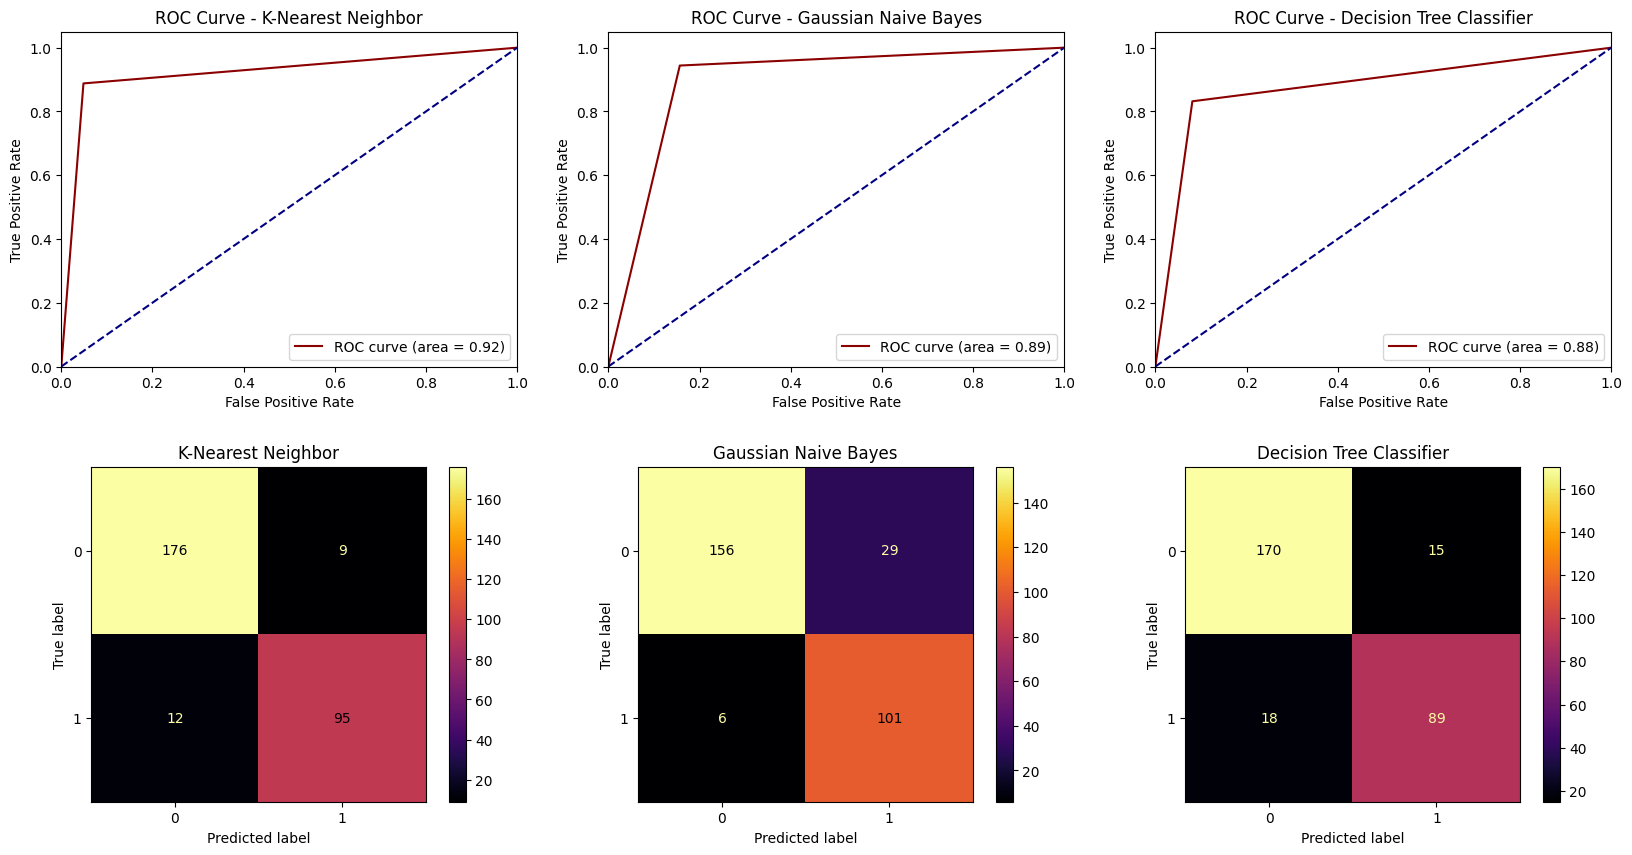

In [28]:
# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(X_test)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

#Deployment

In [29]:
save_df.to_csv("House Price Dataset - Deployment.csv")

# Analisis Data Unsupervised

### Bussiness Understanding 

Analisis data unsupervised adalah  proses mengolah data yang tidak memiliki label sehingga bertujuan untuk mengcluster atau mengelompokkan suatu data yang hampir sama dengan data tertentu.


Ini adalah kumpulan data trek Spotify dalam rentang 125 genre berbeda. Setiap trek memiliki beberapa fitur audio yang terkait dengannya. Data dalam format CSV yang berbentuk tabel dan dapat dimuat dengan cepat.

### Data Understanding

1. Collect Data
2. Penjelasan Setiap Column

Data didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

### Collect Data

In [30]:
df2 = pd.read_csv("https://raw.githubusercontent.com/khaaair/ProjectAkhir_Datmin/main/dataset.csv")

### Describe Data

In [31]:
df2

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Deskripsi Tiap Column

In [33]:
df2.info
# Dataset ini memiliki 114000 baris dan 21 kolom. 
# Berikut adalah penjelasan untuk masing-masing kolom :

# track_id : id spotify untuk lagu tersebut
# artist : nama artis yang membawakan lagu tersebut
# album_name : nama album tempat trek muncul
# track_name : nama dari sebuah trek
# popularity : popularitas sebuah trek adalah nilai antara 0 dan 100, dengan 100 sebagai yang paling populer
# duration_ms : panjang lintasan dalam milidetik
# explicit : apakah lagu tersebut memiliki lirik eksplisit atau tidak (y/n/unknown)
# danceability : seberapa cocok suatu lagu untuk menari berdasarkan elemen musi termasuk tempo, ritme, kekuatan ketukan
# energy : ukuran perseptual insensitas dan aktivitas
# key : kunci trek yang berbeda
# loudness : kenyaringan keseluruhan trek dalam desibel (dB)
# mode : menunjukkan modalitas (mayor/minor) dari sebuah trek, jenis tangga nada dari mana konten melodinya diturunkan
# speechiness : mendeteksi keberadaan kata - kata yang diucapkan di trek
# acousticness : ukuran kepercayaan dari 0,0 - 1,0 apakah lagu tersebut akustik
# instrumentalness : memprediksi apakah trek tidak berisi vokal
# liveness : mendeteksi kehadiran penonton dalam rekaman
# valence : ukuran dari 0,0 - 1,0 yang menggambarkan kepositifan musik yang disampaikan oleh sebuah lagu
# tempo : perkiraan tempo lagu secara keseluruhan dalam ketukan per menit
# time_signature : perkiraan tanda tangan waktu
# track_genre : genre tempat lagu tersebut berada

# Dataset ini memiliki 3 jenis tipe data yaitu int, float, dan object. Terdapat juga 2240 nilai pada setiap kolom, menandakan tidak ada missing value pada dataset ini.

<bound method DataFrame.info of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1    

In [34]:
# describing data 
df2.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

In [35]:
# untuk mengecek missing value :
df2.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [36]:
#Menghapus kolom yang missing value atau value yang invalid
df2.dropna(inplace=True)

df2.isna().sum()


Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [37]:
df4 = df2

### Data Preparation

Data Exploration

<ipython-input-38-f1a14650d04e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')


<Axes: >

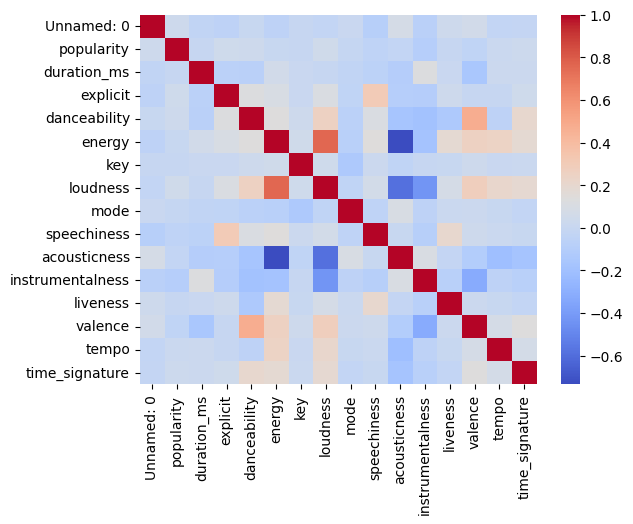

In [38]:

sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')

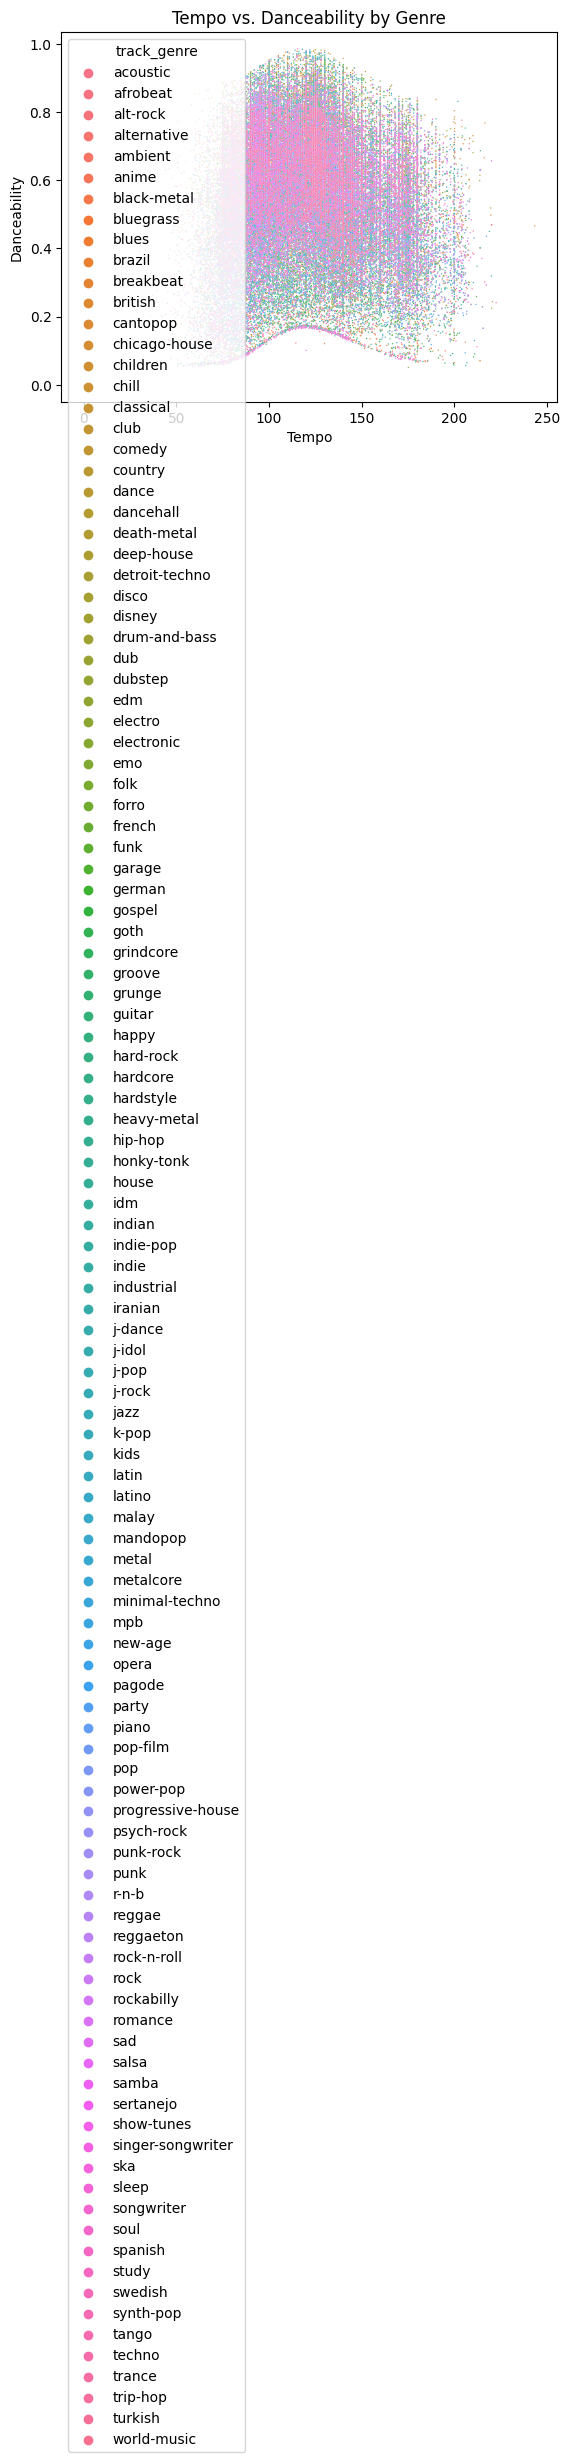

In [39]:
sns.scatterplot(x='tempo', y='danceability', data=df2, hue='track_genre', s=1)
plt.title('Tempo vs. Danceability by Genre')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.show()


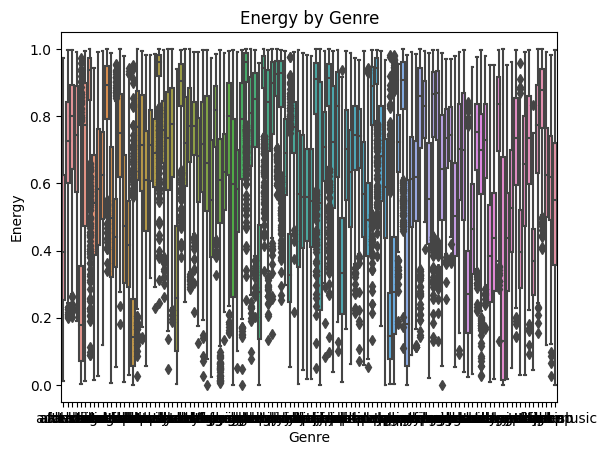

In [40]:
sns.boxplot(x='track_genre', y='energy', data=df2)
plt.title('Energy by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.show()

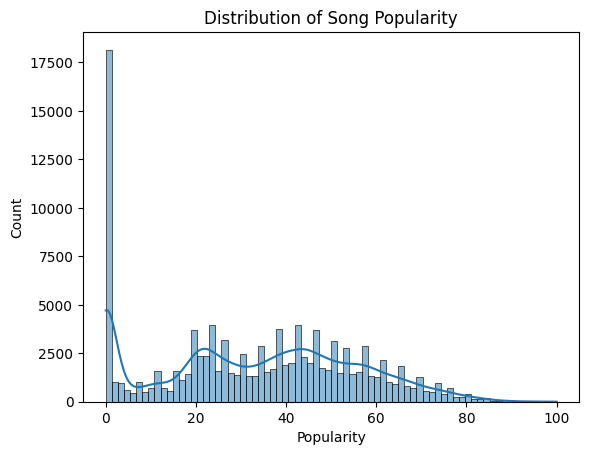

In [41]:
sns.histplot(data=df2, x="popularity", kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

Data Reduction

In [42]:

#Memilih kolom yang akan digunakan
columns_to_use = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df2 = df2[columns_to_use]

#Normalisasi value setiap kolom

Slicing

In [43]:
df2 = df2.sample(n=1000, random_state=42)

Encoding

In [44]:
df2 = pd.get_dummies(df2)


Scalling

In [45]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df2)

Modelling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

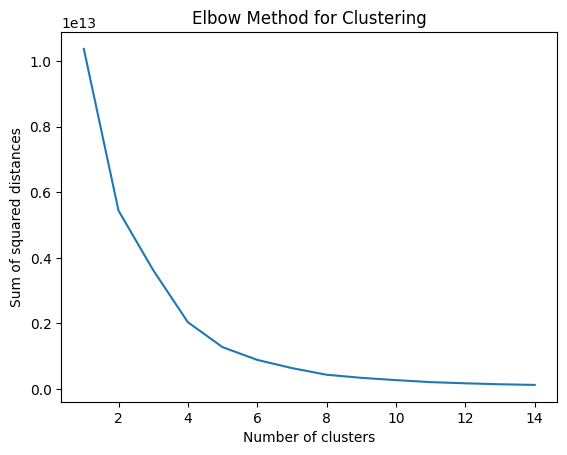

In [46]:
# Initialize an empty list to store the sum of squared distances for each number of clusters
sse = [] 

# Fit the KMeans model to the data with a range of different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)  # Add the sum of squared distances for the current number of clusters to the list

# Plot the sum squared distances for each number of clusters for elbow method

plt.plot(range(1, 15), sse)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [47]:
# Initialize the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)

# Fit the model to the data
kmeans.fit(df2)  

# Generate cluster assignments for each data point
clusters = kmeans.predict(df2)

# Print the cluster assignments for the first few data points
print(clusters[:10])

df2['cluster'] = clusters

# Print the first few rows of the dataframe with the new cluster column
print(df2.head())

[1 0 2 0 2 2 1 0 2 0]
        danceability  energy  key  loudness  mode  speechiness  acousticness  \
113186         0.369   0.598    7    -6.984     1       0.0304       0.00511   
42819          0.171   0.997    7    -3.586     1       0.1180       0.00521   
59311          0.173   0.803    9   -10.071     0       0.1440       0.61300   
90417          0.419   0.382    9   -13.438     1       0.0322       0.32000   
61000          0.555   0.941    9    -3.294     0       0.0481       0.48400   

        instrumentalness  liveness  valence    tempo  duration_ms  cluster  
113186           0.00000     0.176   0.0466  148.014       440247        1  
42819            0.80100     0.420   0.0294  122.223        93933        0  
59311            0.00191     0.195   0.0887   75.564       213578        2  
90417            0.00000     0.106   0.4620   84.185       146706        0  
61000            0.00000     0.266   0.8130   92.487       236293        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
def plot_cluster(df2):
    cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    num_rows = len(cols)
    fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
    
    # plot untuk setiap kolom numerik
    for i, col in enumerate(cols):
        row = i
        col_idx = 0
        sns.histplot(data=df2, x=col, ax=ax[row][col_idx], kde=True)
        col_idx = 1
        sns.boxplot(data=df2, x=col, ax=ax[row][col_idx])

    plt.tight_layout()
    plt.show()
    

In [49]:
cluster1 = df2[df2['cluster'] == 0]
cluster2 = df2[df2['cluster'] == 1]
cluster3 = df2[df2['cluster'] == 2]
cluster4 = df2[df2['cluster'] == 3]

In [50]:
cluster1.describe()

danceability      energy         key    loudness        mode  \
count     367.00000  367.000000  367.000000  367.000000  367.000000   
mean        0.58633    0.611144    5.487738   -8.594038    0.645777   
std         0.17997    0.280812    3.483644    5.399094    0.478930   
min         0.00000    0.000020    0.000000  -38.384000    0.000000   
25%         0.48650    0.406500    2.000000  -10.308500    0.000000   
50%         0.61900    0.661000    5.000000   -7.409000    1.000000   
75%         0.70750    0.856000    9.000000   -4.905000    1.000000   
max         0.95800    0.999000   11.000000   -1.746000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   367.000000    367.000000        367.000000  367.000000  367.000000   
mean      0.093683      0.377289          0.150301    0.219687    0.528578   
std       0.114369      0.355910          0.312121    0.185963    0.271464   
min       0.000000      0.000002          0.000000    0.033800    0.000000   
25%       0.037300      0.031500          0.000000    0.097600    0.297000   
50%       0.052000      0.238000          0.000032    0.136000    0.565000   
75%       0.098150      0.732500          0.015800    0.307000    0.754500   
max       0.941000      0.996000          0.974000    0.970000    0.971000   

            tempo    duration_ms  cluster  
count  367.000000     367.000000    367.0  
mean   123.657027  151064.953678      0.0  
std     28.482361   35329.748117      0.0  
min      0.000000   31240.000000      0.0  
25%    103.056000  134018.000000      0.0  
50%    122.905000  159480.000000      0.0  
75%    141.822500  177042.000000      0.0  
max    199.901000  196133.000000      0.0

In [51]:
cluster_1 = df2.loc[df2['cluster'] == 0]

ciri_ciri = cluster_1[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
                       
rata_rata = ciri_ciri.mean()
standar_deviasi = ciri_ciri.std()

print("Rata-rata ciri-ciri cluster 1:\n", rata_rata)
print("\nStandar deviasi ciri-ciri cluster 1:\n", standar_deviasi)

Rata-rata ciri-ciri cluster 1:
 danceability             0.586330
energy                   0.611144
key                      5.487738
loudness                -8.594038
mode                     0.645777
speechiness              0.093683
acousticness             0.377289
instrumentalness         0.150301
liveness                 0.219687
valence                  0.528578
tempo                  123.657027
duration_ms         151064.953678
dtype: float64

Standar deviasi ciri-ciri cluster 1:
 danceability            0.179970
energy                  0.280812
key                     3.483644
loudness                5.399094
mode                    0.478930
speechiness             0.114369
acousticness            0.355910
instrumentalness        0.312121
liveness                0.185963
valence                 0.271464
tempo                  28.482361
duration_ms         35329.748117
dtype: float64


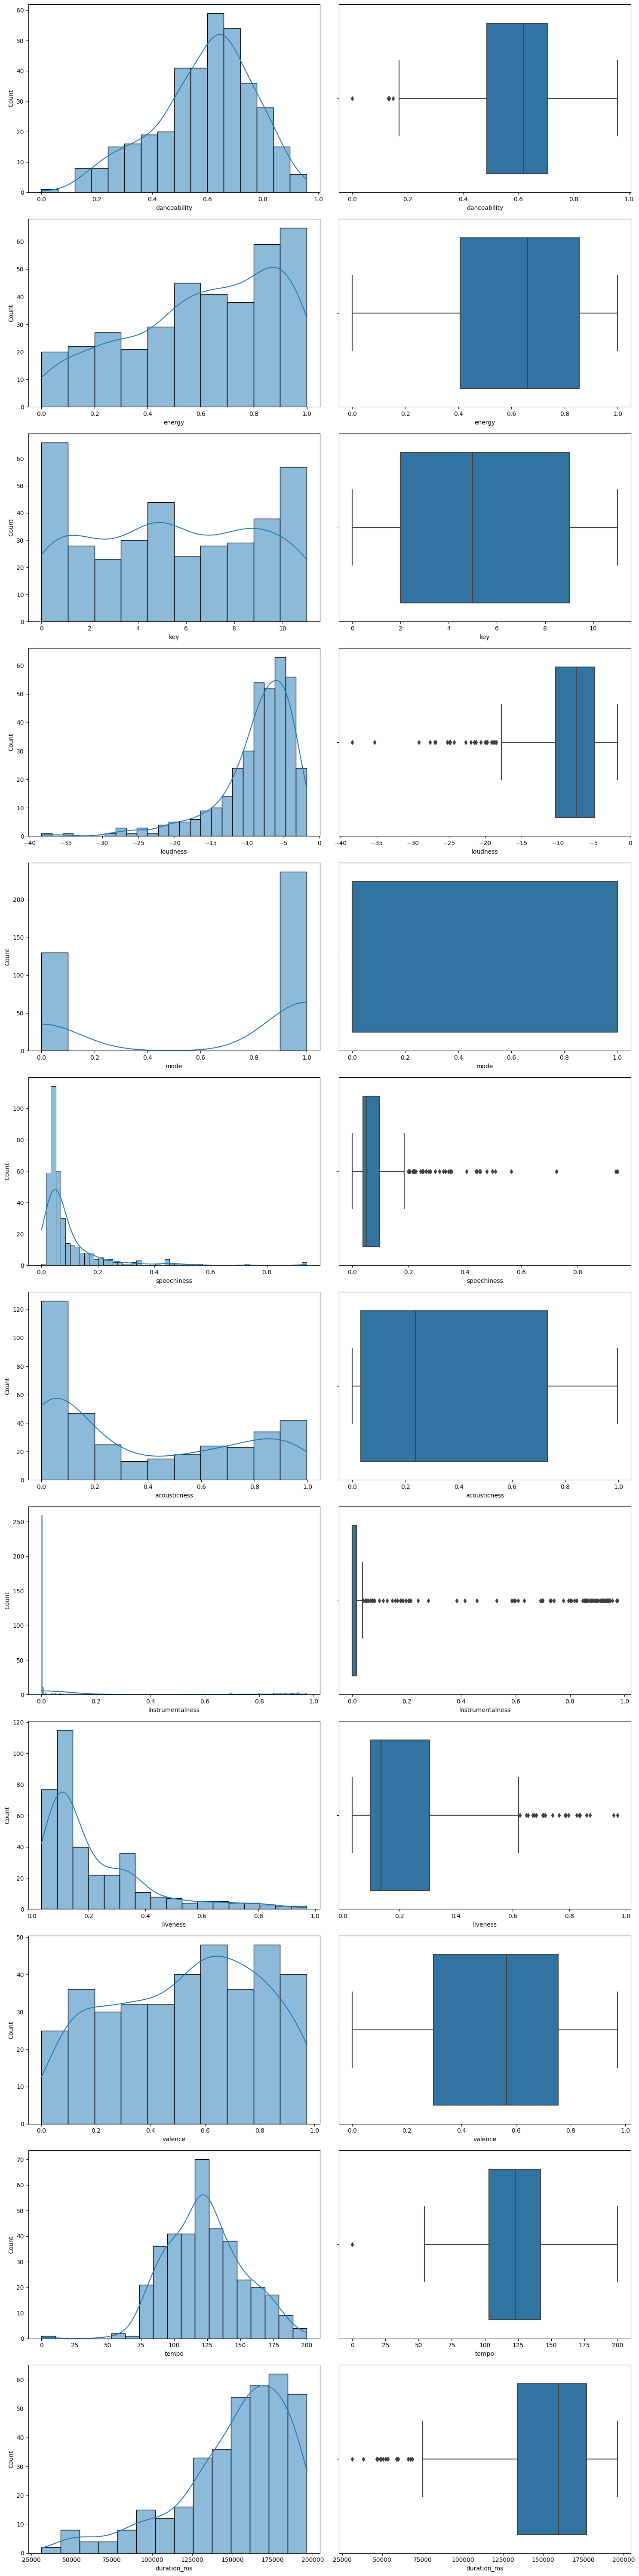

In [52]:
plot_cluster(cluster1)

Ciri-ciri Cluster 1

In [53]:
cluster2.describe()

danceability     energy        key   loudness       mode  speechiness  \
count     95.000000  95.000000  95.000000  95.000000  95.000000    95.000000   
mean       0.518525   0.625807   5.578947  -9.723116   0.600000     0.081062   
std        0.206318   0.243295   3.627844   4.840144   0.492497     0.136146   
min        0.074900   0.018900   0.000000 -28.521000   0.000000     0.024000   
25%        0.336500   0.474000   2.000000 -11.152500   0.000000     0.035050   
50%        0.527000   0.639000   6.000000  -8.587000   1.000000     0.046000   
75%        0.673500   0.836000   9.000000  -6.829500   1.000000     0.075000   
max        0.895000   0.977000  11.000000  -2.364000   1.000000     0.959000   

       acousticness  instrumentalness   liveness    valence       tempo  \
count     95.000000         95.000000  95.000000  95.000000   95.000000   
mean       0.295324          0.361799   0.224925   0.363166  122.126042   
std        0.329735          0.406300   0.212874   0.250601   25.290567   
min        0.000004          0.000000   0.030900   0.023300   72.009000   
25%        0.004075          0.000019   0.099350   0.150000  104.757500   
50%        0.145000          0.050400   0.122000   0.336000  122.018000   
75%        0.620000          0.827500   0.279000   0.554000  138.017500   
max        0.977000          0.969000   0.975000   0.933000  179.638000   

         duration_ms  cluster  
count      95.000000     95.0  
mean   427656.652632      1.0  
std    101155.763659      0.0  
min    335306.000000      1.0  
25%    358980.000000      1.0  
50%    396000.000000      1.0  
75%    457073.000000      1.0  
max    859345.000000      1.0

In [54]:
cluster_2 = df2.loc[df2['cluster'] == 1]

ciri_ciri = cluster_2[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
                       
rata_rata = ciri_ciri.mean()
standar_deviasi = ciri_ciri.std()

print("Rata-rata ciri-ciri cluster 2:\n", rata_rata)
print("\nStandar deviasi ciri-ciri cluster 2:\n", standar_deviasi)

Rata-rata ciri-ciri cluster 2:
 danceability             0.518525
energy                   0.625807
key                      5.578947
loudness                -9.723116
mode                     0.600000
speechiness              0.081062
acousticness             0.295324
instrumentalness         0.361799
liveness                 0.224925
valence                  0.363166
tempo                  122.126042
duration_ms         427656.652632
dtype: float64

Standar deviasi ciri-ciri cluster 2:
 danceability             0.206318
energy                   0.243295
key                      3.627844
loudness                 4.840144
mode                     0.492497
speechiness              0.136146
acousticness             0.329735
instrumentalness         0.406300
liveness                 0.212874
valence                  0.250601
tempo                   25.290567
duration_ms         101155.763659
dtype: float64


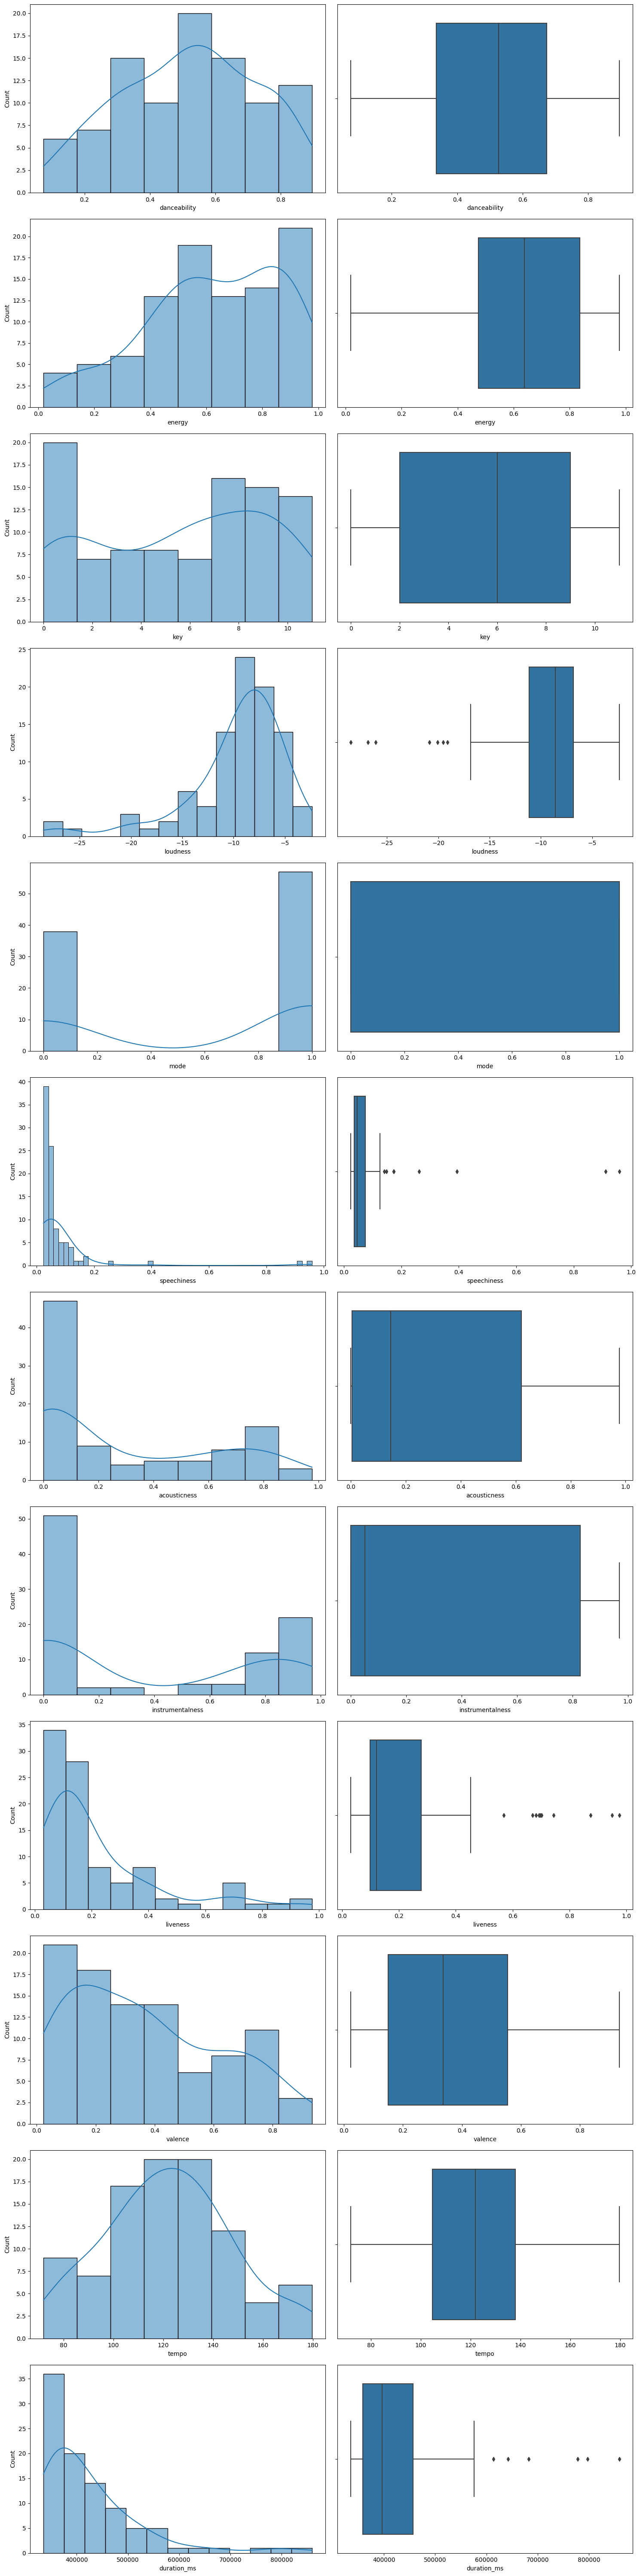

In [55]:
plot_cluster(cluster2)

Ciri-ciri Cluster 2

In [56]:
cluster3.describe()

danceability      energy         key    loudness        mode  \
count    537.000000  537.000000  537.000000  537.000000  537.000000   
mean       0.557125    0.675430    5.126629   -7.297966    0.614525   
std        0.170857    0.225724    3.521625    3.888304    0.487161   
min        0.102000    0.008920    0.000000  -32.364000    0.000000   
25%        0.444000    0.525000    2.000000   -9.044000    0.000000   
50%        0.568000    0.710000    5.000000   -6.312000    1.000000   
75%        0.681000    0.865000    8.000000   -4.792000    1.000000   
max        0.929000    1.000000   11.000000    0.643000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   537.000000    537.000000        537.000000  537.000000  537.000000   
mean      0.073808      0.263402          0.109672    0.201042    0.464861   
std       0.068935      0.303348          0.262160    0.171957    0.262541   
min       0.023700      0.000003          0.000000    0.018900    0.037100   
25%       0.034200      0.014100          0.000000    0.099100    0.254000   
50%       0.046800      0.110000          0.000020    0.128000    0.427000   
75%       0.079800      0.483000          0.009880    0.258000    0.690000   
max       0.415000      0.993000          0.965000    0.992000    0.992000   

            tempo    duration_ms  cluster  
count  537.000000     537.000000    537.0  
mean   124.953812  241406.106145      2.0  
std     30.522569   33992.079430      0.0  
min     57.886000  196345.000000      2.0  
25%    100.007000  213578.000000      2.0  
50%    124.023000  232772.000000      2.0  
75%    145.926000  262000.000000      2.0  
max    210.095000  333826.000000      2.0

In [57]:
cluster_3 = df2.loc[df2['cluster'] == 2]

ciri_ciri = cluster_3[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
                       
rata_rata = ciri_ciri.mean()
standar_deviasi = ciri_ciri.std()

print("Rata-rata ciri-ciri cluster 3:\n", rata_rata)
print("\nStandar deviasi ciri-ciri cluster 3:\n", standar_deviasi)

Rata-rata ciri-ciri cluster 3:
 danceability             0.557125
energy                   0.675430
key                      5.126629
loudness                -7.297966
mode                     0.614525
speechiness              0.073808
acousticness             0.263402
instrumentalness         0.109672
liveness                 0.201042
valence                  0.464861
tempo                  124.953812
duration_ms         241406.106145
dtype: float64

Standar deviasi ciri-ciri cluster 3:
 danceability            0.170857
energy                  0.225724
key                     3.521625
loudness                3.888304
mode                    0.487161
speechiness             0.068935
acousticness            0.303348
instrumentalness        0.262160
liveness                0.171957
valence                 0.262541
tempo                  30.522569
duration_ms         33992.079430
dtype: float64


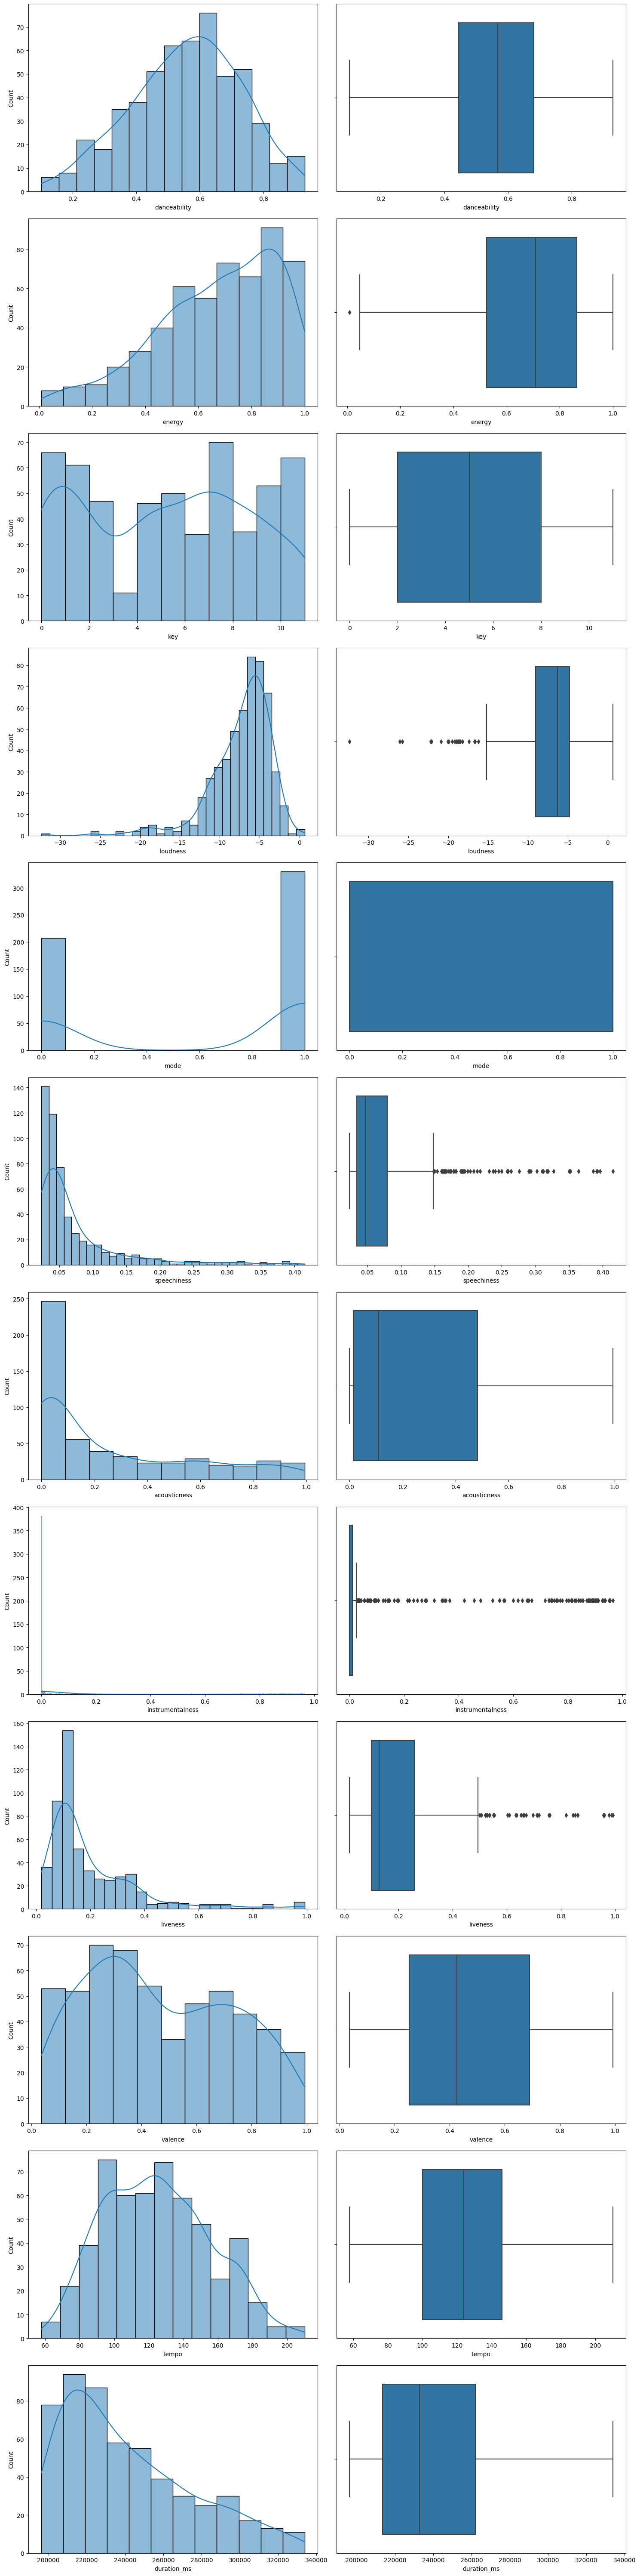

In [58]:
plot_cluster(cluster3)

Ciri-ciri Cluster3

In [59]:
cluster4.describe()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
count         1.000   1.000  1.0     1.000   1.0       1.0000         1.000   
mean          0.101   0.532  5.0   -13.299   1.0       0.0676         0.846   
std             NaN     NaN  NaN       NaN   NaN          NaN           NaN   
min           0.101   0.532  5.0   -13.299   1.0       0.0676         0.846   
25%           0.101   0.532  5.0   -13.299   1.0       0.0676         0.846   
50%           0.101   0.532  5.0   -13.299   1.0       0.0676         0.846   
75%           0.101   0.532  5.0   -13.299   1.0       0.0676         0.846   
max           0.101   0.532  5.0   -13.299   1.0       0.0676         0.846   

       instrumentalness  liveness  valence   tempo  duration_ms  cluster  
count             1.000     1.000  1.00000   1.000          1.0      1.0  
mean              0.476     0.719  0.00001  91.951    1736852.0      3.0  
std                 NaN       NaN      NaN     NaN          NaN      NaN  
min               0.476     0.719  0.00001  91.951    1736852.0      3.0  
25%               0.476     0.719  0.00001  91.951    1736852.0      3.0  
50%               0.476     0.719  0.00001  91.951    1736852.0      3.0  
75%               0.476     0.719  0.00001  91.951    1736852.0      3.0  
max               0.476     0.719  0.00001  91.951    1736852.0      3.0

In [60]:
cluster_4 = df2.loc[df2['cluster'] == 3]

ciri_ciri = cluster_4[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
                       
rata_rata = ciri_ciri.mean()
standar_deviasi = ciri_ciri.std()

print("Rata-rata ciri-ciri cluster 4:\n", rata_rata)
print("\nStandar deviasi ciri-ciri cluster 4:\n", standar_deviasi)

Rata-rata ciri-ciri cluster 4:
 danceability        1.010000e-01
energy              5.320000e-01
key                 5.000000e+00
loudness           -1.329900e+01
mode                1.000000e+00
speechiness         6.760000e-02
acousticness        8.460000e-01
instrumentalness    4.760000e-01
liveness            7.190000e-01
valence             1.000000e-05
tempo               9.195100e+01
duration_ms         1.736852e+06
dtype: float64

Standar deviasi ciri-ciri cluster 4:
 danceability       NaN
energy             NaN
key                NaN
loudness           NaN
mode               NaN
speechiness        NaN
acousticness       NaN
instrumentalness   NaN
liveness           NaN
valence            NaN
tempo              NaN
duration_ms        NaN
dtype: float64


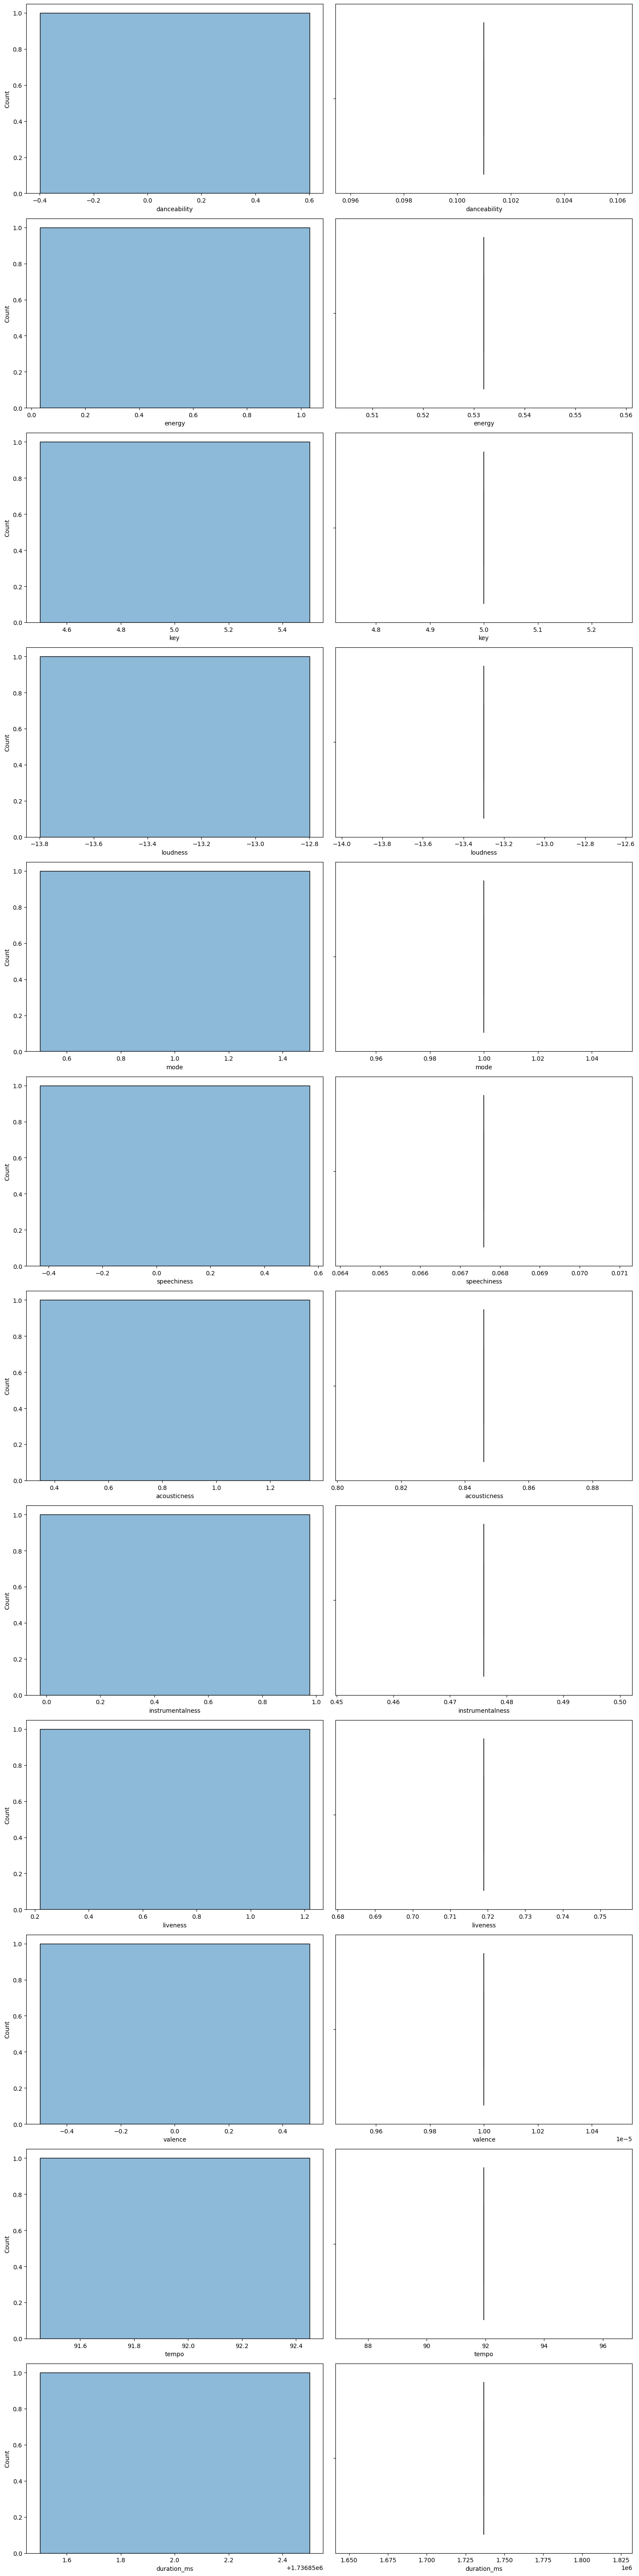

In [61]:
plot_cluster(cluster4)

#Evaluation

In [62]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(df2.drop('cluster', axis=1), clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(df2.drop('cluster', axis=1), clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(df2.drop('cluster', axis=1), clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


<ipython-input-62-8294c7fe596c>:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df_scores.style.hide_index())


#Deployment

Save Data

In [63]:
df2.to_csv("Spotify Dataset - Deployment.csv")